# Before you begin

## Update your course repository

You need to clone the course repository to Nova. You probably already have cloned this, so you can skip this step.

```bash
git clone git@github.com:EEOB-BioData/BCB546_Spring2024.git
```

You will still need to pull new changes to this repository at the beginning of class. This will enable you to access new data files and scripts needed for in-class activities.

```bash
cd BCB546_Spring2024
git pull
```

Note that if you have modified any files in the repository, you will need to commit those changes before you can pull new changes. If you don't care about the changes, just delete and re-clone the repository.

## Start Jupyter notebook on Nova on demand.

You can start Jupyter notebook on Nova on demand. This will allow you to run Jupyter notebook on the server and access it from your local machine.

1. Go to the [Nova OnDemand](https://nova-ondemand.its.iastate.edu/) and login
2. Under the "Interactive Apps" tab, click on "Jupyter Notebook", request desired resources and click "Launch"
3. Wait for the job to start and click on the "Connect to Jupyter" button



# Biopython


Biopython is a set of freely available tools for biological computation written in Python by an international team of developers. It is a distributed collaborative effort to develop Python libraries and applications which address the needs of current and future work in bioinformatics. 

In this notebook, we will learn how to use Biopython to perform various tasks such as reading and writing sequence files, searching and retrieving sequences from databases, and performing multiple sequence alignments.


## 1. Sequence Searching and Retrieval from databases

In this section, we will learn how to perform sequence searching and retrieval using Biopython. We will explore different databases and functions available for this purpose.

We need to some specific modules from Biopython to perform sequence searching and retrieval. These modules are:

In [1]:
from Bio import Entrez
from Bio import SeqIO

### NCBI data retreival

Suppose you want to download some nucleotide sequences from NCBI.

https://www.ncbi.nlm.nih.gov/nucleotide/

The search term `"zea mays subsp mays"[Organism] AND tb1[Gene Name]` gives you about 247 entries (as of 04-11-2024). It would be quite laborious to  search, download, edit the downloaded file, and import them to python for analyses. 


This can be easily done using `Entrez` module of Biopython.


To demonstrate,

Set up your email address for NCBI:

In [2]:
Entrez.email = "your_email@example.com"

In [3]:
handle = Entrez.esearch(db="nucleotide", term='"zea mays subsp mays"[Organism] AND tb1[Gene Name]', retmax=500)
record = Entrez.read(handle)
handle.close()
print("Total records:", record['Count'])

Total records: 247


The `record` object is a dictionary

In [4]:
print("Matching IDs:", record["IdList"])

Matching IDs: ['1810959207', '1810959197', '1810959195', '1810959193', '1810959191', '1810959189', '16305499', '16305498', '16305496', '16305494', '16305492', '16305490', '16305489', '16305487', '16305485', '16305483', '16305481', '16305479', '16305477', '16305475', '16305474', '16305472', '16305470', '16305468', '16305466', '16305464', '16305462', '16305461', '16305459', '16305457', '16305455', '16305454', '16305452', '16305451', '16305449', '16305448', '16305446', '16305444', '16305442', '16305441', '16305439', '16305437', '16305435', '16305433', '16305431', '16305430', '16305428', '16305426', '16305425', '16305423', '16305421', '16305419', '16305418', '16305416', '16305414', '16305413', '16305411', '16305409', '16305407', '16305406', '16305404', '16305403', '16305401', '16305400', '16305398', '16305397', '16305395', '16305394', '16305392', '16305391', '16305389', '16305388', '16305386', '16305385', '16305383', '16305381', '16305380', '16305378', '16305377', '16305375', '16305373', '

In [5]:
print(list(record))

['Count', 'RetMax', 'RetStart', 'IdList', 'TranslationSet', 'TranslationStack', 'QueryTranslation']


In [6]:
record["IdList"][1:6]

['1810959197', '1810959195', '1810959193', '1810959191', '1810959189']

To retreive sequences based on the search, you can create a `for` loop (just one sequence is shown here as example):

In [7]:
for seq_id in record["IdList"][1:2]:
    handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
    seq_record = SeqIO.read(handle, "fasta")
    print(seq_record.id, ":", seq_record.description)
    print(seq_record.seq)
    handle.close()

MN842301.1 : MN842301.1 Zea mays subsp. mays cultivar BML7 teosinte branched 1 (tb1) gene, complete cds
GACATTTTCTACCTACTGAAAGCGGTCTGTTTTTTGTGTTGTCGAGAGTGTGATGGGTAACCATAGTTAATAATGCACTGGATCTATCACTACTCATACAGGTCCCATATGCCTAATAATGTTGTGAAGACCAACTCATCTGACCACATCTGTCCCTACCATGCTTGTACACCACACTACATACATCACTCATCACTGGTCCTTCGTTTCGGTACCCTCCTCCCACAATGTTCAATGTATATACTAATAGTTCTCAAATAAATTCCTGTGGATGTTACAAAAACCCACGGTCTTTGGTTTCCTGAAGAAGTATTTCATGGAGGCGCGCACGTCCATCGTACTGCGTCCTGCAGCTATGGCCGCCCCCATCTGGCCAATAAATGTACTAGGTCACTTGTAGCCAATAGCGTTTCAACATGCACACAGCTTTTCCCCCAATAGTGCAGGTCCTTGTATTCTCCTCCCTCTCCCTCACCTCAAATCTCATCCACACGAACAGGCGGCACGGCAGTATTCCTCCACAGCCCTCCTCTCTATAAGATGGCACAGCCCTCTCAGGTAGGGGCGAGTGTCTCACTCTCACATAGTAAAAAAAAAAAAACGCCCCCAAGGTTCTTAAGCACAATTCTCTAGCTATCTTGGTCTCTTACACAGCCTATGCACATGAGCCCATGCCTCTCCTCTCCTTGCGCCTGCATAGAGAGGTGGTATGATCACCTGGAAAGTTTTTAACTCTCTCTCTCTCTCTCTCTCTCTATTACAGCCTAGACCTTATGCATGGTCGGACGGACACATCTGATCATAGGACATATGAGTAGGCCACACTCCTCCTGCCCCTCTCTCGTAGAGATCAACACACACTGCTCTTAGTGCCAGGACCTAGAGAGGGGAGCGTG

You can always find documentation using `help`

In [8]:
help(Entrez.efetch)

Help on function efetch in module Bio.Entrez:

efetch(db, **keywords)
    Fetch Entrez results which are returned as a handle.

    EFetch retrieves records in the requested format from a list or set of one or
    more UIs or from user's environment.

    See the online documentation for an explanation of the parameters:
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EFetch

    Short example:

    >>> from Bio import Entrez
    >>> Entrez.email = "Your.Name.Here@example.org"
    >>> handle = Entrez.efetch(db="nucleotide", id="AY851612", rettype="gb", retmode="text")
    >>> print(handle.readline().strip())
    LOCUS       AY851612                 892 bp    DNA     linear   PLN 10-APR-2007
    >>> handle.close()

    This will automatically use an HTTP POST rather than HTTP GET if there
    are over 200 identifiers as recommended by the NCBI.

    **Warning:** The NCBI changed the default retmode in Feb 2012, so many
    databases which previously returned text output now giv

In [9]:
record["IdList"][1:5]

['1810959197', '1810959195', '1810959193', '1810959191']

### Searching UniProt Database


Likewise, UniProt, a protein sequence and functional information database, is compatible with biopython to  retreive sequences. The same gene `TB1_MAIZE` is found here

https://www.uniprot.org/uniprotkb/Q93WI2/entry

and using the id `Q93WI2` you can download the sequence as follows:

Load the modules

In [10]:
from Bio import ExPASy
from Bio import SwissProt

In [11]:
handle = ExPASy.get_sprot_raw("Q93WI2")
record = SwissProt.read(handle)
print("Protein Name:", record.description)
print("Organism:", record.organism)
print("Sequence Length:", len(record.sequence))
print("Sequence:", record.sequence)
handle.close()

Protein Name: RecName: Full=Transcription factor TEOSINTE BRANCHED 1;
Organism: Zea mays (Maize).
Sequence Length: 376
Sequence: MFPFCDSSSPMDLPLYQQLQLSPSSPKTDQSSSFYCYPCSPPFAAADASFPLSYQIGSAAAADATPPQAVINSPDLPVQALMDHAPAPATELGACASGAEGSGASLDRAAAAARKDRHSKICTAGGMRDRRMRLSLDVARKFFALQDMLGFDKASKTVQWLLNTSKSAIQEIMADDASSECVEDGSSSLSVDGKHNPAEQLGGGGDQKPKGNCRGEGKKPAKASKAAATPKPPRKSANNAHQVPDKETRAKARERARERTKEKHRMRWVKLASAIDVEAAAASGPSDRPSSNNLSHHSSLSMNMPCAAAELEERERCSSALSNRSAGRMQEITGASDVVLGFGNGGGGYGDGGGNYYCQEQWELGGVVFQQNSRFY


In [12]:
dir(record)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'accessions',
 'annotation_update',
 'comments',
 'created',
 'cross_references',
 'data_class',
 'description',
 'entry_name',
 'features',
 'gene_name',
 'host_organism',
 'host_taxonomy_id',
 'keywords',
 'molecule_type',
 'organelle',
 'organism',
 'organism_classification',
 'protein_existence',
 'references',
 'seqinfo',
 'sequence',
 'sequence_length',
 'sequence_update',
 'taxonomy_id']

### Searching PDB Database

PDB database is a repository for 3D structural data of large biological molecules, such as proteins, DNA and RNA. You can search for a protein structure using the protein name or the PDB ID.

The database is accessible at: https://www.rcsb.org/

For example, to search for the structure of the protein `1A8O` you can use the following code:

In [13]:
# Import PDBList
from Bio.PDB import PDBList

# Initialize PDBList object
pdb_list = PDBList()

# Download PDB file with ID '1A8O'
pdb_list.retrieve_pdb_file('1A8O', file_format='pdb')

Structure exists: '/work/LAS/mhufford-lab/arnstrm/EEOB546/BCB546_Spring2024/course-files/python/a8/pdb1a8o.ent' 


'/work/LAS/mhufford-lab/arnstrm/EEOB546/BCB546_Spring2024/course-files/python/a8/pdb1a8o.ent'

Apart from the the 3 examples shown above, Biopython can also retrieve sequences from other databases such as `KEGG`,  `SCOP`, `PubMed`, `Prosite`, `SwissProt`, `GeneBank`, among others. But for the sake of brevity, we will not cover them here.

## Parse BLAST results

For this example, protein BLAST (blastp) of _Zea mays_ subspp. _mays_ (B73) proteins was run against SwissProt proteins. Unlike the previous run you ran in Dr. Hufford's class, the results are in XML format. Following commands were used:

```bash
# create blastDB
makeblastdb \
   -in uniprot-sprot_viridiplantae.fasta \
   -dbtype prot
# run BLASTp
blastp \
   -max_target_seqs 5 \
   -outfmt 5 \
   -num_threads $SLURM_CPUS_ON_NODE \
   -query BCB546_Spring2024/course-files/blast_dataset/zm_pep.fa \
   -db uniprot-sprot_viridiplantae.fasta \
   -evalue 0.000001 > blast_output.xml
```

First, let's load the necessary modules and parse the XML file.

In [14]:
from Bio.Blast import NCBIXML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We will use the pre-computed blast results for this excerise. The file is named `blast_output.xml` and is located in the `course-files/blast_dataset` directory.

In [15]:
blastoutput = '/work/LAS/mhufford-lab/arnstrm/EEOB546/BCB546_Spring2024/course-files/python/blast_output.xml'

Now, we can parse the XML file using the NCBIXML module from the Bio.Blast package.

In this loop, we are iterating over each alignment in the blast record and printing the alignment title, the length of the alignment, and the e-value of the alignment.

This is just to provide a template, but can be modified to do other things such as extracting the sequences, computing best matching sequences, etc.

In [16]:
result_handle = open(blastoutput)
blast_records = NCBIXML.parse(result_handle)
for blast_record in blast_records:
    for alignment in blast_record.alignments:
        print("Sequence ID:", alignment.title)
        for hsp in alignment.hsps:
            print("Alignment Length:", hsp.align_length)
            print("E-value:", hsp.expect)
            print("Bit Score:", hsp.score)
            print("Identity:", hsp.identities)

Sequence ID: sp|P20027|MYB3_HORVU Myb-related protein Hv33 OS=Hordeum vulgare OX=4513 GN=MYB2 PE=2 SV=3
Alignment Length: 108
E-value: 7.41799e-49
Bit Score: 414.0
Identity: 73
Sequence ID: sp|Q8LPH6|MYB86_ARATH Transcription factor MYB86 OS=Arabidopsis thaliana OX=3702 GN=MYB86 PE=2 SV=1
Alignment Length: 118
E-value: 5.35337e-47
Bit Score: 405.0
Identity: 73
Sequence ID: sp|Q8VZQ2|MYB61_ARATH Transcription factor MYB61 OS=Arabidopsis thaliana OX=3702 GN=MYB61 PE=2 SV=1
Alignment Length: 118
E-value: 1.02684e-46
Bit Score: 404.0
Identity: 75
Sequence ID: sp|Q9LXV2|MYB46_ARATH Transcription factor MYB46 OS=Arabidopsis thaliana OX=3702 GN=MYB46 PE=2 SV=1
Alignment Length: 109
E-value: 8.1701e-45
Bit Score: 385.0
Identity: 69
Sequence ID: sp|Q7XBH4|MYB4_ORYSJ Transcription factor MYB4 OS=Oryza sativa subsp. japonica OX=39947 GN=MYB4 PE=2 SV=2
Alignment Length: 109
E-value: 3.30416e-41
Bit Score: 359.0
Identity: 63
Sequence ID: sp|Q9SEI0|WER_ARATH Transcription factor WER OS=Arabidopsis t

The data can also be used to create a pandas dataframe for further analysis, like plotting.

Let's preset some figure parameters.

In [17]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 10,5
plt.rcParams.update({'font.size': 8})

Extract the information from the BLAST output file that we need to plot the data

In [18]:
result_handle = open(blastoutput)
blast_records = NCBIXML.parse(result_handle)

# Initialize an empty dictionary to store hit counts for each query
query_hit_counts = {}
for blast_record in blast_records:
    # Get the query ID
    query_id = blast_record.query
    # Check if there are any hits for the query
    if blast_record.alignments:
        # Count the number of hits for the query
        hit_count = len(blast_record.alignments)
        # Update hit count for the query
        query_hit_counts[query_id] = hit_count

# Convert the dictionary into lists for plotting
queries = list(query_hit_counts.keys())
hit_counts = list(query_hit_counts.values())

We can now create a bar plot to visualize the number of hits for each query:

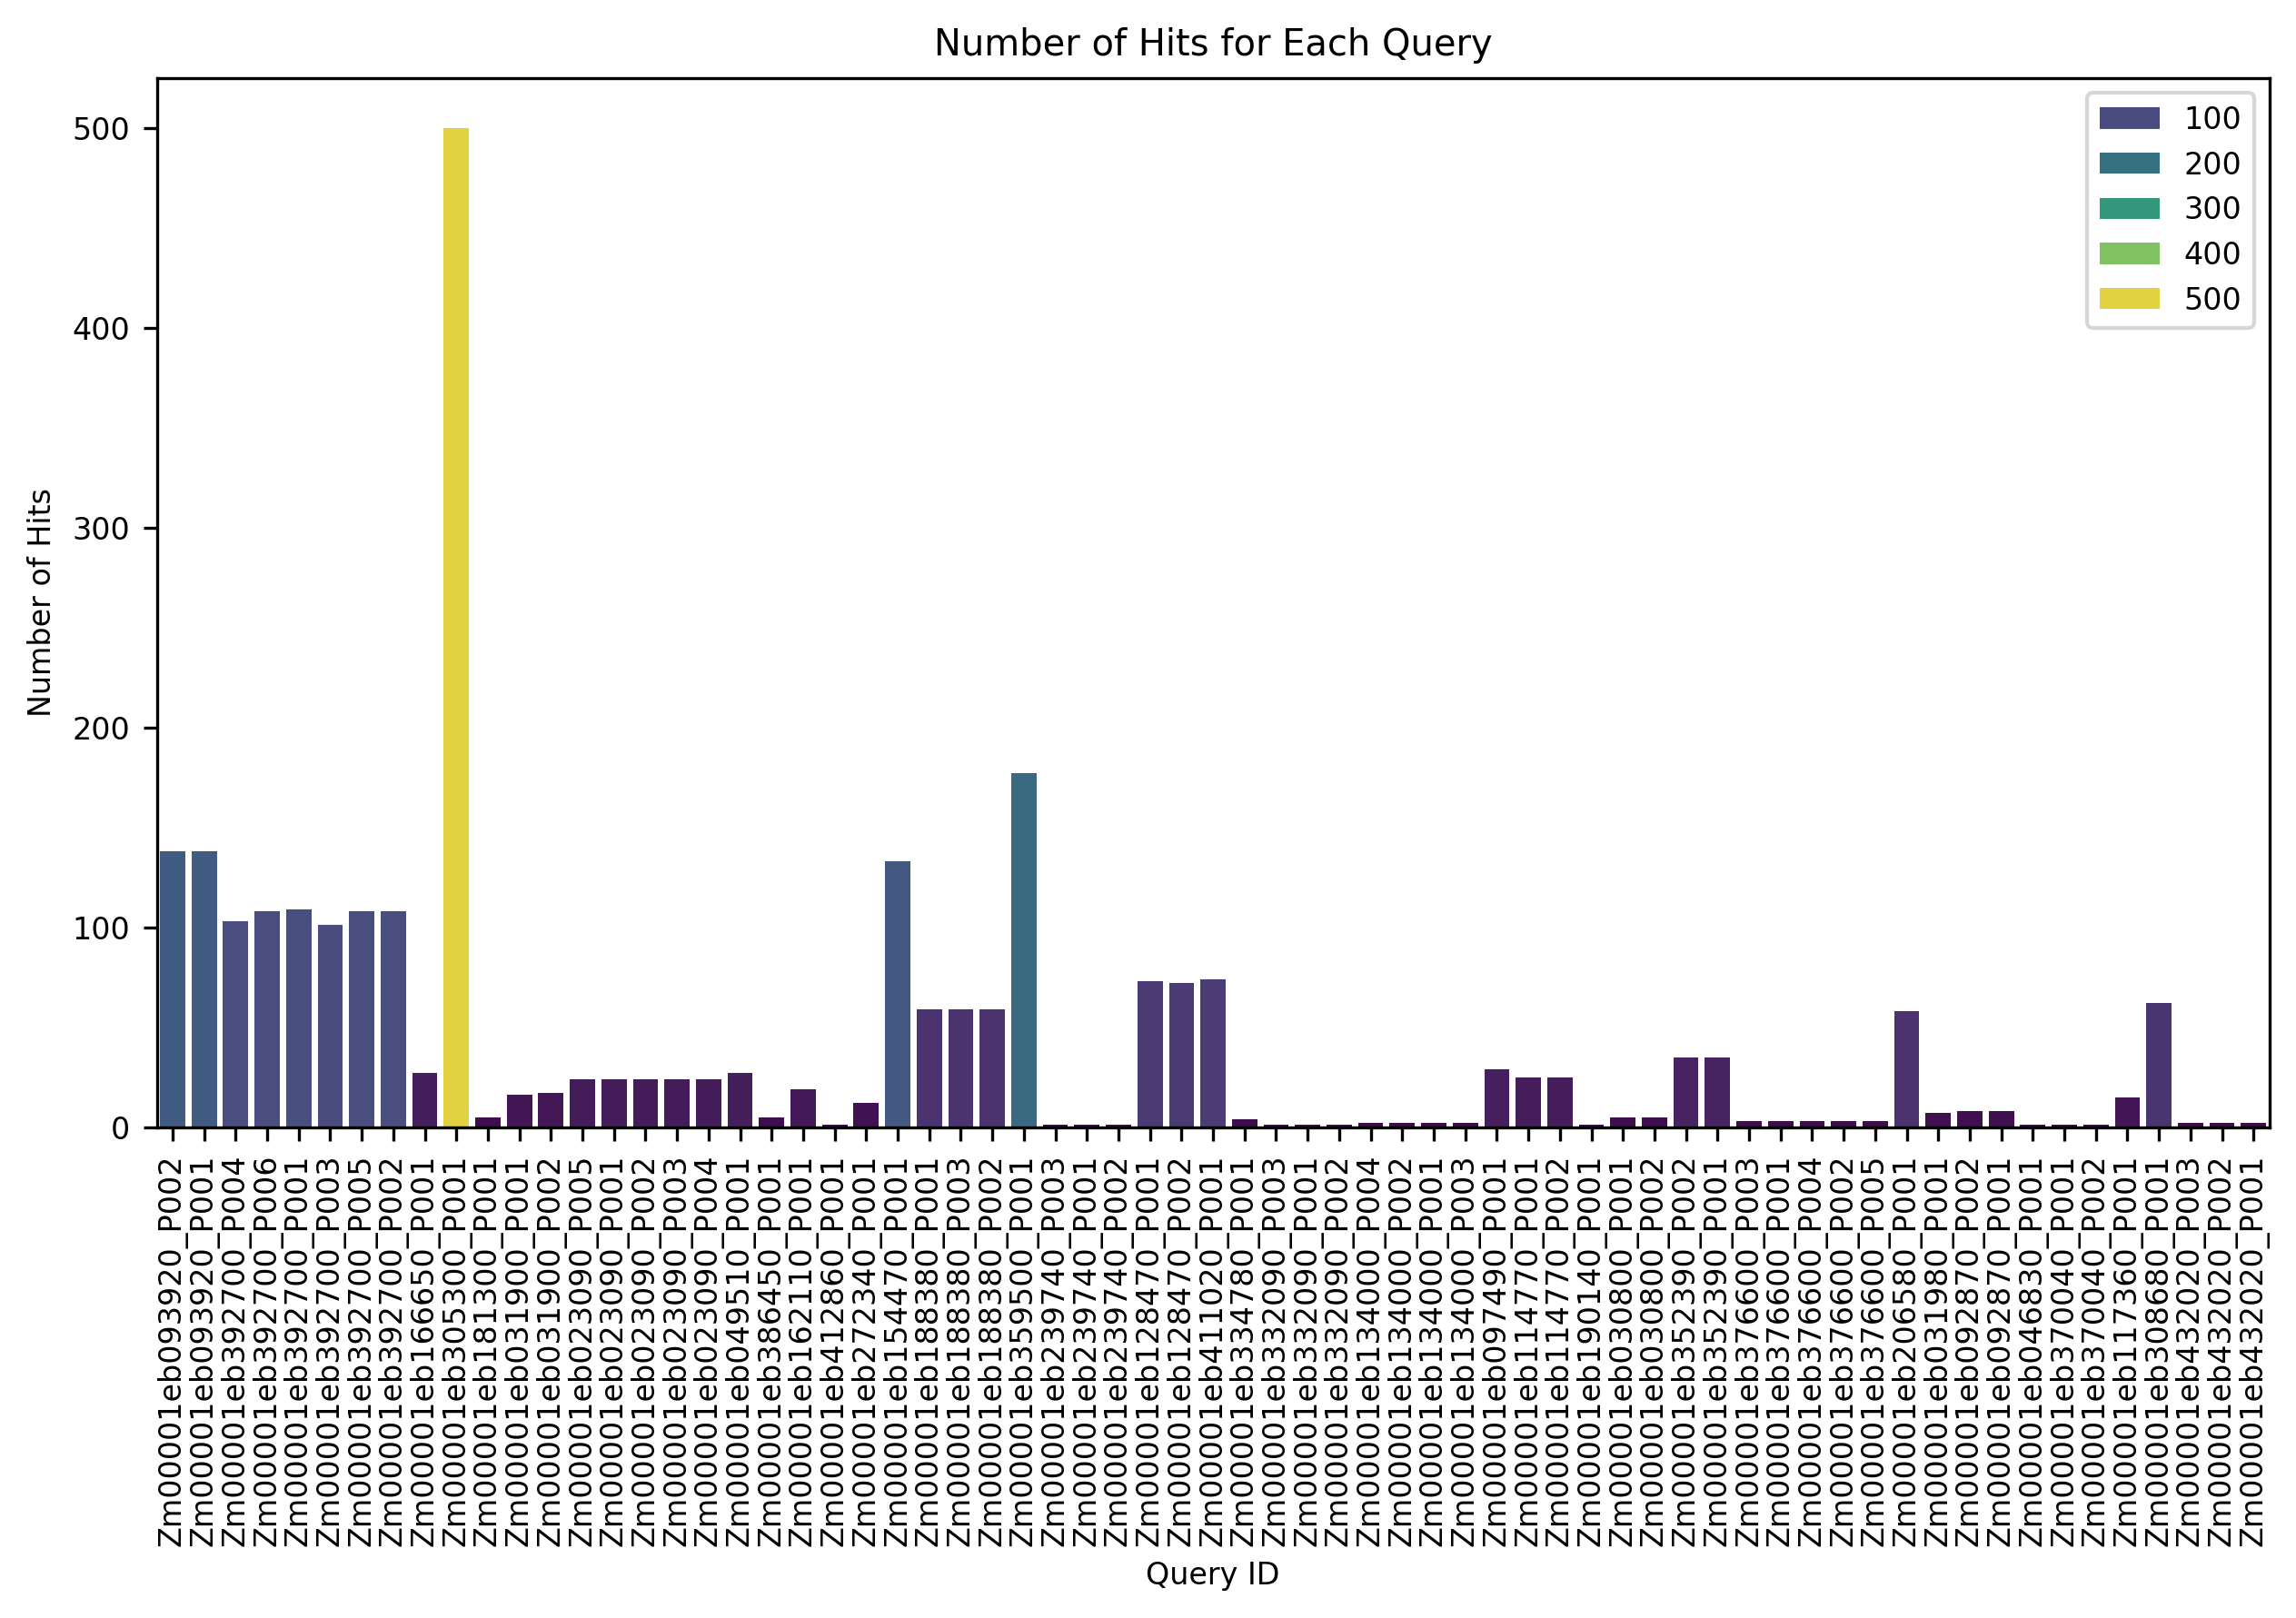

In [19]:
sns.barplot(x=queries, y=hit_counts, hue = hit_counts , palette="viridis")
plt.xlabel("Query ID")
plt.ylabel("Number of Hits")
plt.title("Number of Hits for Each Query")
plt.xticks(rotation=90)
plt.show()

Here is another example to print the alignments in a tabular format:

In [20]:
result_handle = open(blastoutput)
blast_records = NCBIXML.parse(result_handle)
alignments = []
for blast_record in blast_records:
    # Iterate over each alignment in the record
    for alignment in blast_record.alignments:
        # Iterate over each high-scoring segment pair (HSP) in the alignment
        for hsp in alignment.hsps:
            # Create a dictionary to store alignment details
            alignment_data = {
                "Query ID": blast_record.query,
                "Subject ID": alignment.hit_id,
                "Alignment Length": hsp.align_length,
                "E-value": hsp.expect,
                "Bit Score": hsp.score,
                "Query Alignment": hsp.query,
                "Subject Alignment": hsp.sbjct
            }
            # Append alignment data to the list
            alignments.append(alignment_data)

# Convert the list of dictionaries into a pandas DataFrame
alignment_df = pd.DataFrame(alignments)

# Display the DataFrame
print(alignment_df.head())

               Query ID             Subject ID  Alignment Length  \
0  Zm00001eb093920_P002   sp|P20027|MYB3_HORVU               108   
1  Zm00001eb093920_P002  sp|Q8LPH6|MYB86_ARATH               118   
2  Zm00001eb093920_P002  sp|Q8VZQ2|MYB61_ARATH               118   
3  Zm00001eb093920_P002  sp|Q9LXV2|MYB46_ARATH               109   
4  Zm00001eb093920_P002   sp|Q7XBH4|MYB4_ORYSJ               109   

        E-value  Bit Score                                    Query Alignment  \
0  7.417990e-49      414.0  VRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLERSGKSCRLRW...   
1  5.353370e-47      405.0  GEH--CTHKTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLE...   
2  1.026840e-46      404.0  GEH--CTHKTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLE...   
3  8.170100e-45      385.0  KTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLERSGKSCRL...   
4  3.304160e-41      359.0  CTHKTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLERSGKS...   

                                   Subject Alignment  
0  VRKGLWSPEEDEKLYNHIIRHGVGCWSSVPRLAALNRCGKSCRLRW

## Sequence Manipulation

The `Seq` object is the basic object for sequence manipulation in Biopython. It is a string-like object that represents a biological sequence. It has many useful methods and attributes for sequence manipulation.

Here is an example of how to create a `Seq` object:

In [21]:
from Bio.Seq import Seq

Creating `seq` object:

In [22]:
dna_sequence = "GACATTTTCTACCTACTGAAAGCGGTCTGTTTTTTGTGTTGTCGAGAGTGTGATGGGTAACCATAG"
my_seq = Seq(dna_sequence)
len(my_seq)

66

Many methods specific for `my_seq` object is now available.


| Method                 | Description                                                                                         |
|------------------------|-----------------------------------------------------------------------------------------------------|
| back_transcribe        | Transcribes DNA sequence to RNA and then reverse complements the RNA sequence.                      |
| complement             | Returns the complement of the sequence (DNA or RNA).                                                |
| complement_rna         | Returns the complement of an RNA sequence.                                                           |
| count                  | Counts the occurrences of a substring in the sequence.                                               |
| count_overlap          | Counts overlapping occurrences of a substring in the sequence.                                       |
| defined                | Checks if a sequence is defined (not None or empty).                                                 |
| defined_ranges         | Returns a list of defined regions in the sequence.                                                   |
| endswith               | Checks if the sequence ends with a specified suffix.                                                 |
| find                   | Finds the index of the first occurrence of a substring in the sequence.                              |
| index                  | Returns the index of the first occurrence of a substring in the sequence.                            |
| islower                | Checks if all characters in the sequence are lowercase.                                              |
| isupper                | Checks if all characters in the sequence are uppercase.                                              |
| join                   | Joins the elements of a sequence into a single string using a specified delimiter.                    |
| lower                  | Converts all characters in the sequence to lowercase.                                                 |
| lstrip                 | Removes leading whitespace (or specified characters) from the sequence.                              |
| removeprefix           | Removes a specified prefix from the sequence if present.                                              |
| removesuffix           | Removes a specified suffix from the sequence if present.                                              |
| replace                | Replaces occurrences of a specified substring with another substring.                                 |
| reverse_complement     | Returns the reverse complement of a DNA sequence.                                                     |
| reverse_complement_rna | Returns the reverse complement of an RNA sequence.                                                     |
| rfind                  | Finds the index of the last occurrence of a substring in the sequence.                                |
| rindex                 | Returns the index of the last occurrence of a substring in the sequence.                              |
| rsplit                 | Splits the sequence into a list of substrings using a specified delimiter, starting from the end.     |
| rstrip                 | Removes trailing whitespace (or specified characters) from the sequence.                              |
| search                 | Searches for a specified pattern within the sequence.                                                 |
| split                  | Splits the sequence into a list of substrings using a specified delimiter.                            |
| startswith             | Checks if the sequence starts with a specified prefix.                                                |
| strip                  | Removes leading and trailing whitespace (or specified characters) from the sequence.                  |
| transcribe             | Transcribes DNA sequence to RNA.                                                                     |
| translate              | Translates DNA or RNA sequence to protein sequence.                                                   |
| upper                  | Converts all characters in the sequence to uppercase.                                                 |


Reverse complement

In [23]:
my_seq.reverse_complement(), my_seq

(Seq('CTATGGTTACCCATCACACTCTCGACAACACAAAAAACAGACCGCTTTCAGTAG...GTC'),
 Seq('GACATTTTCTACCTACTGAAAGCGGTCTGTTTTTTGTGTTGTCGAGAGTGTGAT...TAG'))

Transcribes DNA sequence to RNA

In [24]:
my_seq.transcribe()

Seq('GACAUUUUCUACCUACUGAAAGCGGUCUGUUUUUUGUGUUGUCGAGAGUGUGAU...UAG')

Translate DNA sequence to protein sequence (can also use RNA)

In [25]:
my_seq.translate()

Seq('DIFYLLKAVCFLCCRECDG*P*')

Counts the occurrences of a substring in the sequence

In [26]:
my_seq.count("AT")

3

Finds the index of the first occurrence of a substring

In [27]:
my_seq.find("CG")

22

In [28]:
my_seq[22:24]

Seq('CG')

Checks if the sequence starts with a specified prefix

In [29]:
my_seq.startswith("GAC")

True

In [30]:
my_seq.startswith("ATC")

False

Similarly, check if sequence ends with the specified string

In [31]:
my_seq.endswith("TCG")

False

Returns the index of the first occurrence of a substring in the sequence

In [32]:
my_seq.index("CG")

22

Splitting sequences using a delimiter

In [33]:
sequence = Seq("ATCG|ATCG")
substrings = sequence.split("|")
substrings

[Seq('ATCG'), Seq('ATCG')]

## Reading and Writing Sequence files


We can use `SeqIO.parse()` to read sequences from a FASTA file. The `SeqIO.parse()` function returns an iterator over the sequence records in the file. We then iterate over each sequence record and print its ID and sequence.

In [34]:
from Bio import SeqIO

In [35]:
# Define the path to the sequence file
fasta_file = "zm_dna.fasta"

# Read sequences from the FASTA file
sequences = SeqIO.parse(fasta_file, "fasta")

# Print IDs and sequences of each sequence in the file
for seq_record in sequences:
    print("ID:", seq_record.id)
    print("Sequence:", seq_record.seq)


ID: Zm00038ab171350_T001
Sequence: ATGGAACAGGGCGATCCTACTCCCGCCGCCTCTGCCTGCAACTACGACCCTGCCGCCGCACCACCCGCGTGGATCCCGCTCCACGACCACGACGACACGCTACTACAGCAGCTCGACGCAATTCTCCTCGGCATGGACGACGACGACGTTGCCACCGCCGACGACCGCTGCTGCTCCGGCTGGCTCTCCTCCTCGCCCTCGCCCTCGCCCTCGTCCTCCTCCGAGGCGACGACAACGGCGTCACCACCGCCGAGCACGCGGGAGCAGCACAGGCGGCACGCGGCGAAAGACGCCGCCGCCAACGCCGCCTTGGCGGGAGGAGGCGACGAGAAGCGGGCGCTGACGACGGCGGCCTTCATCGGGGTGCGGAAGCGGCCGTGGGGCAAGTTCGCGGCCGAGATCCGCGACTCGACGCGCAAGGGCGCCCGCGTGTGGCTCGGCACCTTCGACACCCCCGAGGCCGCCGCGCTGGCCTACGACCAGGCCGCCCTGGCCGCGCGCGGCGCCACCGCCGTGCTCAACTTCCCCGTGGAGCGCGTGGTGGAGTCGCTGGGCGCGCTCGCGCTCGCCGGCGCCGGCTCCCCCGTCCTCGCGCTGAAGCGCCGGCACTCCAAGCGCACGCGCAGGCGCAAGCTCTCCGCCGTGGCGACGACCGACGGCGACGGCAAAGACACGATGATGAAGCAGCCGCGACGGCGACAGCCTGCTGCGGCGCCGCGCCAATGCTCTGGGCTGCCCGGCGCCGTGCCTTCGTACACCACCGTGGCGGCGGTGCCGCCGCCACCGCAGCAGCATGCGACGGCGCGCGGCCAGAGCCACACGCGCTACGGCGTCGTGGAGCTGGAGGACCTCGGCACCGATTACTTGGACGAGCTCCTCCGGGTGTCGTCCGAGTTGGAGTATTAG
ID: Zm00038ab046330_T003
Sequence: ATGGATTATGACAAGTCTAGAAG

For writing, we first create SeqRecord objects for each sequence, specifying the sequence itself, the ID, and an optional description. We then use `SeqIO.write()` to write these `SeqRecord` objects to a FASTA file. The function takes a list of `SeqRecord` objects, the output file path, and the format (in this case, "fasta").

In [36]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

In [37]:
# Create SeqRecord objects for sequences
seq1 = SeqRecord(Seq("ATCGATCG"), id="seq1", description="Example sequence 1")
seq2 = SeqRecord(Seq("GCTAGCTA"), id="seq2", description="Example sequence 2")
seq3 = SeqRecord(Seq("CCCCGGGG"), id="seq3", description="Example sequence 3")

# Define the output file path
output_file = "output.fasta"

# Write SeqRecord objects to a FASTA file
SeqIO.write([seq1, seq2, seq3], output_file, "fasta")

print("Sequences written to:", output_file)

Sequences written to: output.fasta


## Phylogenetic Tree Construction

Here, we will use the `tb1` gene from various maize and its ancesotrs to build a phylogenetic tree. 

First, we import required modules:

In [53]:
from Bio import Phylo
from Bio import AlignIO
from Bio import SeqIO
import subprocess

define input and output files

In [44]:
input_file = "tb1_zm.fasta"
output_alignment_file = "tb1_zm_aligned.fasta"

Define the MUSCLE command line string

In [49]:
muscle_cmd = f'muscle -in {input_file} -out {output_alignment_file}'

Run MUSCLE alignment using subprocess

In [50]:
subprocess.run(muscle_cmd, shell=True, check=True)


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

tb1_zm 9 seqs, lengths min 1401, max 3204, avg 2732
00:00:00   15 MB(-12%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00   15 MB(-12%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00   45 MB(-35%)  Iter   1  100.00%  Align node       
00:00:00   45 MB(-35%)  Iter   1  100.00%  Root alignment
00:00:01   48 MB(-38%)  Iter   2  100.00%  Refine tree   
00:00:01   48 MB(-38%)  Iter   2  100.00%  Root alignment
00:00:01   48 MB(-38%)  Iter   2  100.00%  Root alignment
00:00:02   48 MB(-38%)  Iter   3  100.00%  Refine biparts
00:00:04   48 MB(-38%)  Iter   4  100.00%  Refine biparts
00:00:04   48 MB(-38%)  Iter   5  100.00%  Refine biparts
00:00:04   48 MB(-38%)  Iter   5  100.00%  Refine biparts


CompletedProcess(args='muscle -in tb1_zm.fasta -out tb1_zm_aligned.fasta', returncode=0)

View Alignment file

In [55]:
alignment = AlignIO.read(output_alignment_file, "fasta")
print(alignment)

Alignment with 9 rows and 3930 columns
--------------------------------TATGCGATACGA...--- AF131650.1
--------------------------------TATGCGATGCGA...--- AF131649.1
--------------------------------------------...ATA MN842305.1
--------------------------------TATGTGATGCGA...--- AF131658.1
--------------------------------------------...ATA MN842306.1
GGATAATGTGCACCAGGTGTACCCTGAGGCGCTATGTGATGCGA...--- AF131672.1
--------------------------------------------...ATA MN842301.1
--------------------------------------------...--- AF415145.1
--------------------------------------------...--- AF415146.1


To build tree, we will use a simplest distance method `upgma`

Again, load modules:

In [56]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

Read the aligned sequences from the output file (you can skip this!)

In [57]:
alignment = AlignIO.read(output_alignment_file, "fasta")

calculate the distance matrix

In [58]:
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

Construct the tree

In [59]:
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

Draw the tree


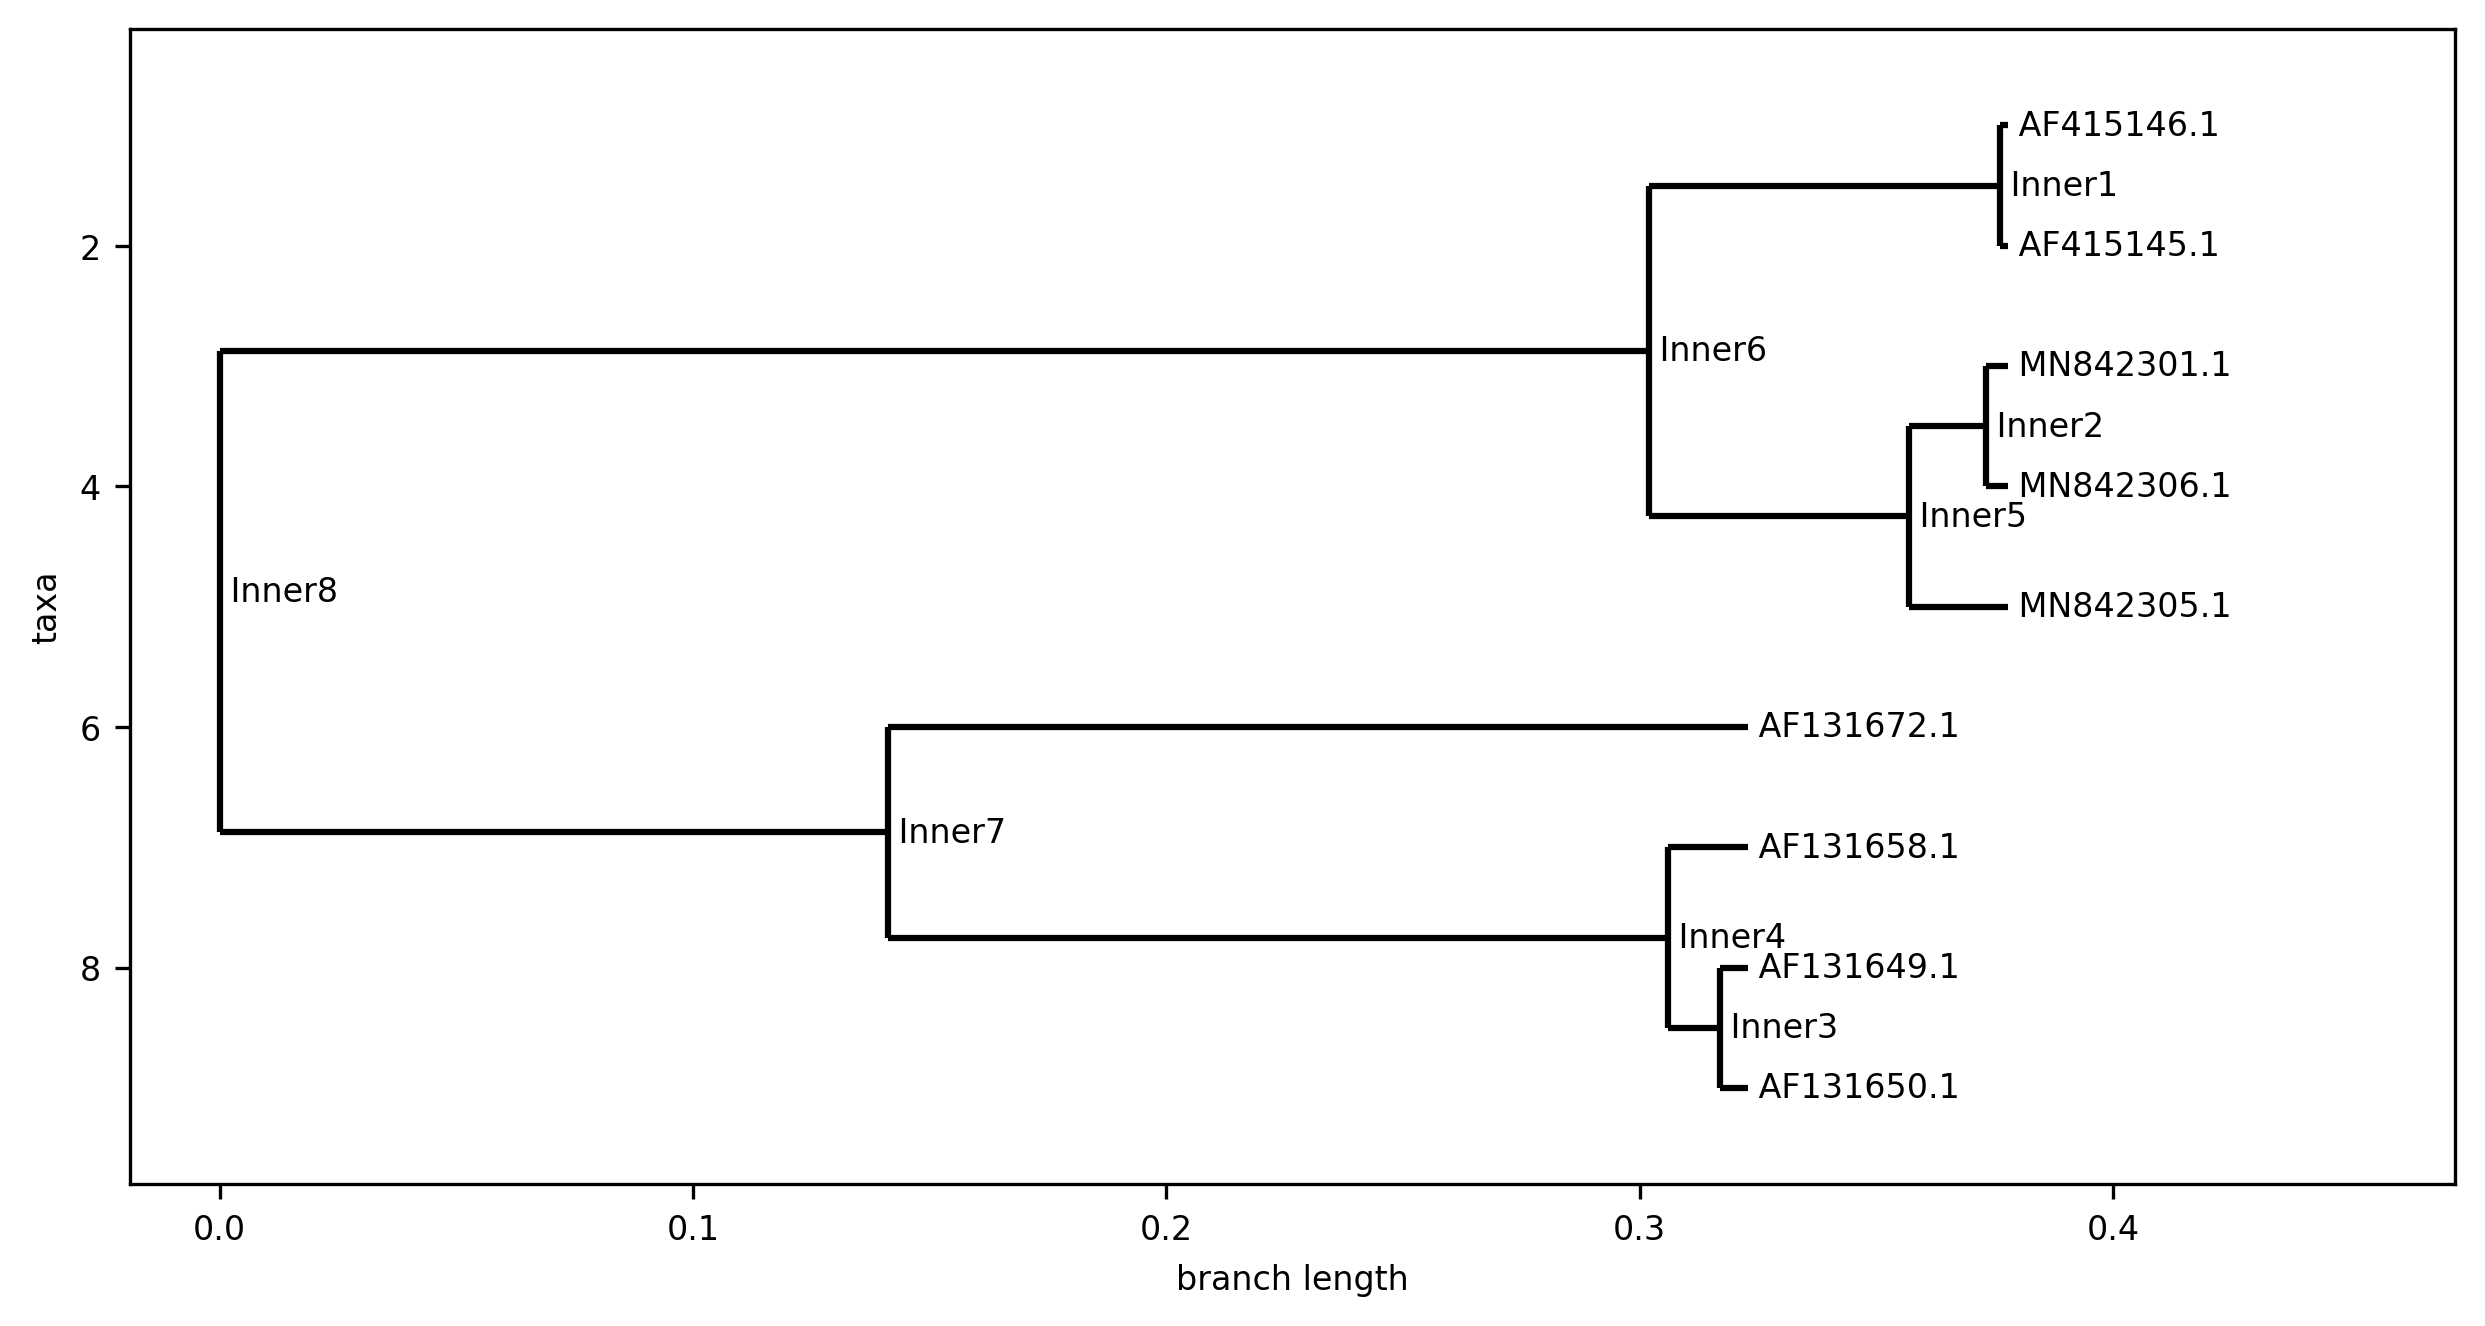

In [60]:
Phylo.draw(tree)

Since the names are not very informative, we will use the sequence description as labels

In [61]:
input_file = "tb1_zm.fasta"
sequences = SeqIO.parse(input_file, "fasta")
descriptions = {seq_record.id: seq_record.description for seq_record in sequences}

# Update tip labels with sequence descriptions
for leaf in tree.get_terminals():
    sequence_id = leaf.name
    if sequence_id in descriptions:
        leaf.name = descriptions[sequence_id]

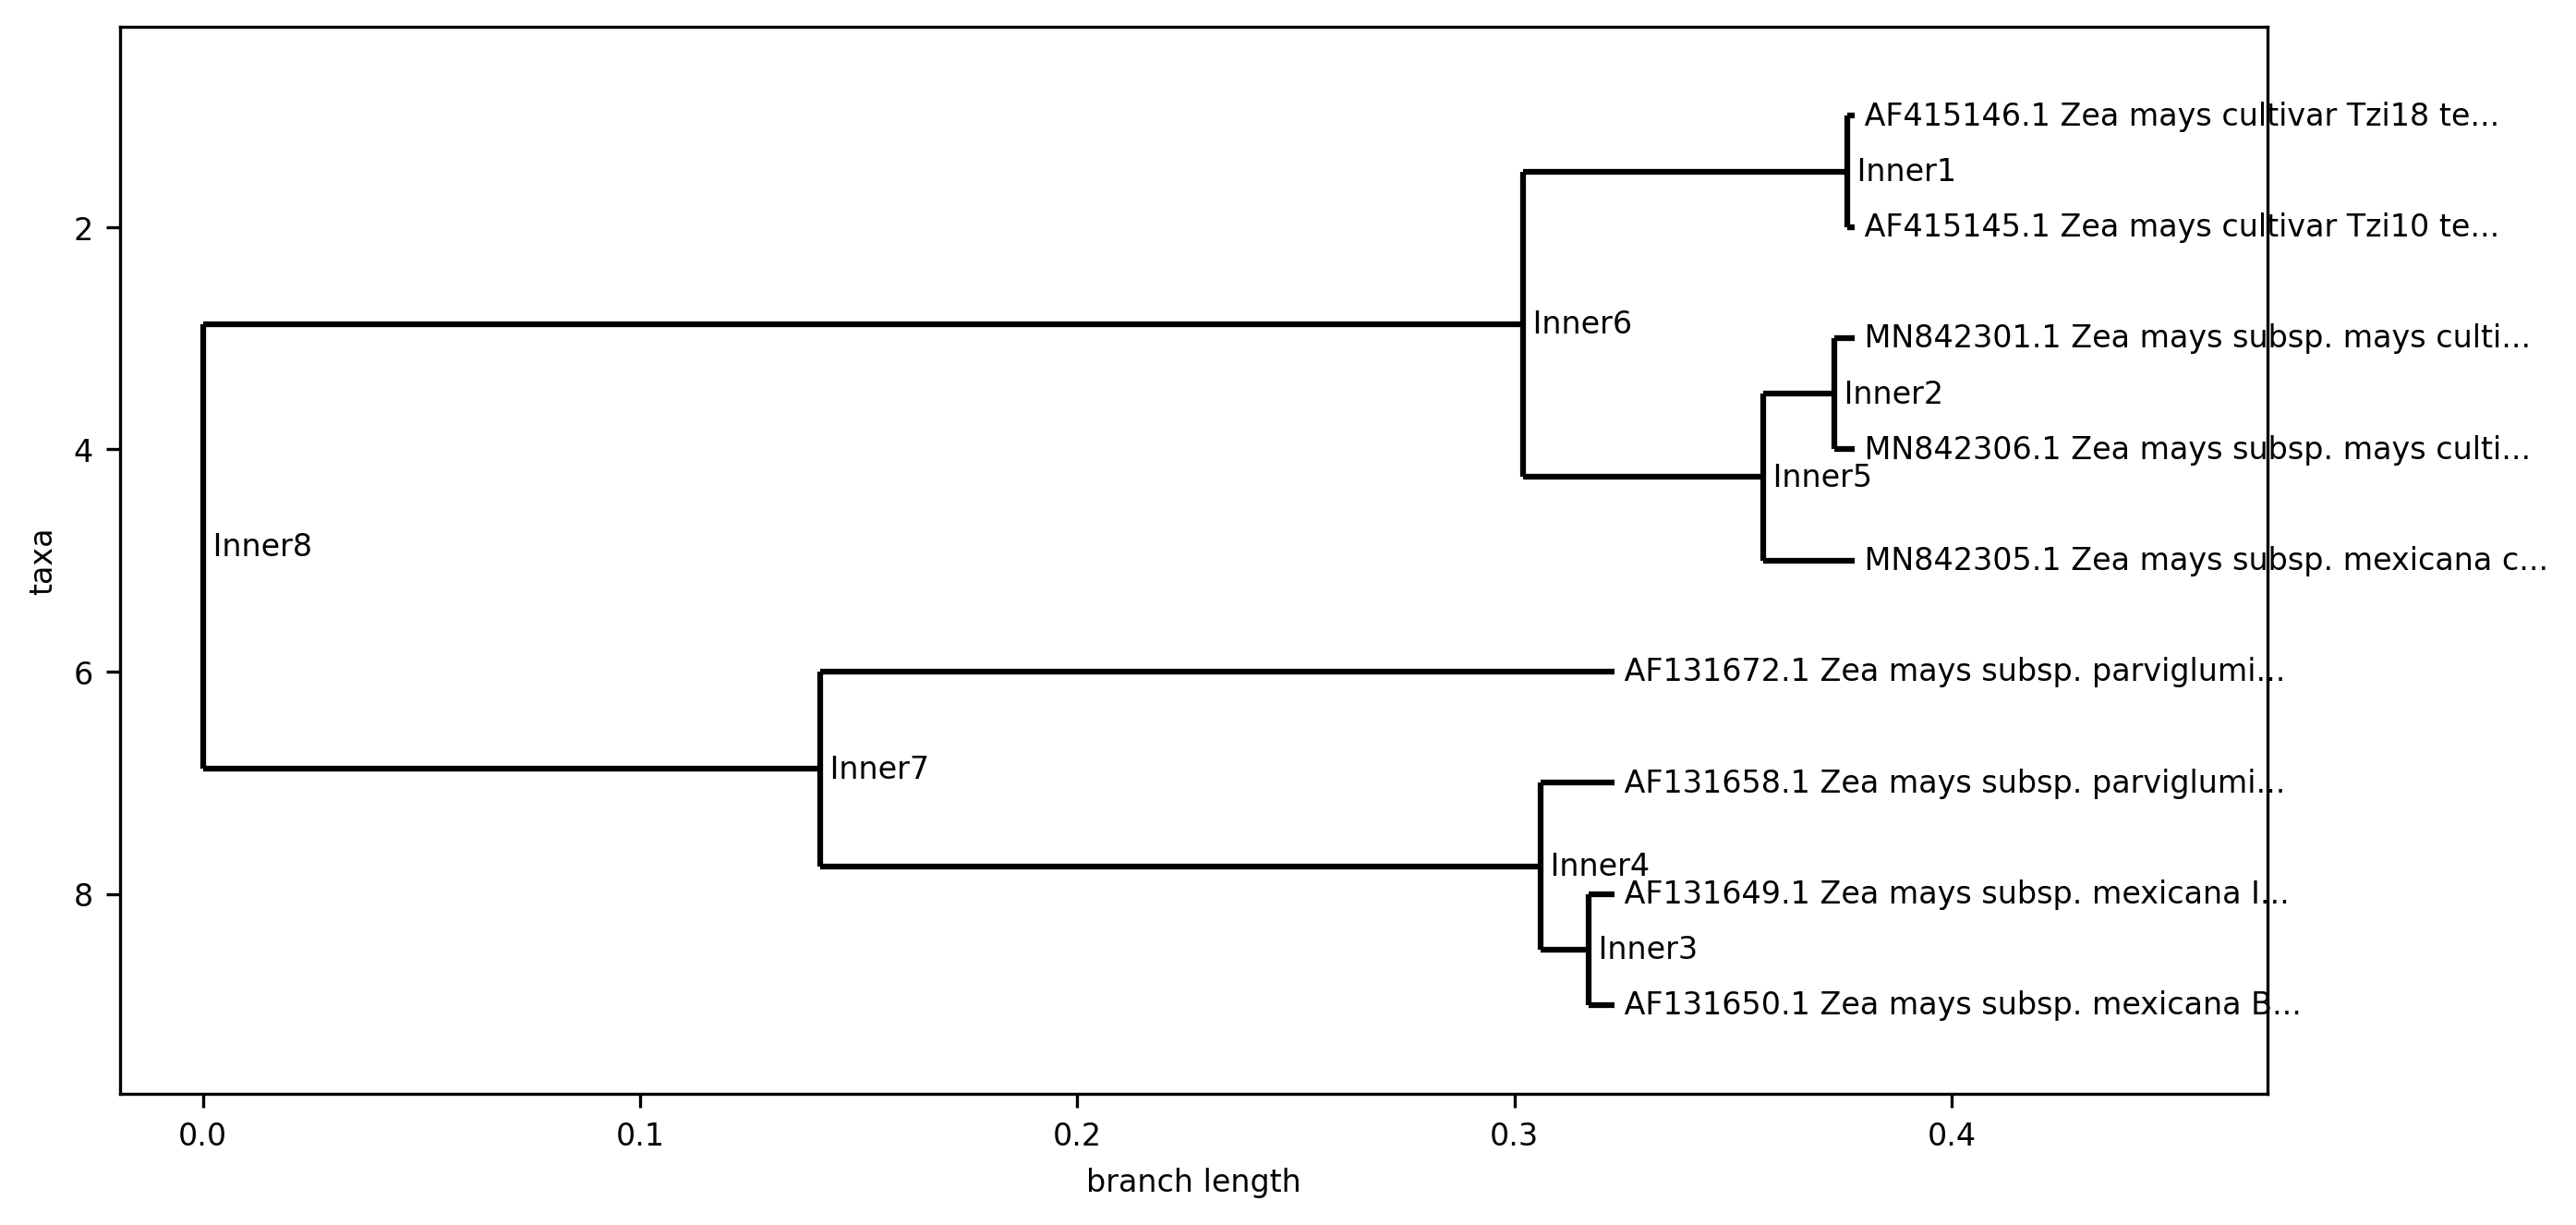

In [62]:
Phylo.draw(tree)